In [31]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_circles,make_blobs
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import normalize
from sklearn.datasets import load_wine

In [32]:
features, target = load_wine(return_X_y=True)
Xtrain,Xtest,ytrain,ytest=train_test_split(features, target,test_size=0.50,
                                                random_state=45)
print(Xtrain.shape)
print(ytrain.shape)

(89, 13)
(89,)


# Logistic Reggression

In [40]:
model = LogisticRegression()
model.fit(Xtrain,ytrain)

print(model.coef_)
print(model.intercept_)

[[ 0.07852083 -0.04938583  0.04399897 -0.78493759 -0.09530895  0.30606414
   0.48927669 -0.05672601  0.12136789  0.30014895  0.01716184  0.53478093
   0.02461944]
 [ 0.26874874 -0.28945622 -0.09128989  0.41234558  0.0312611   0.11297698
   0.41997389  0.09864829  0.37457012 -1.07106478  0.19900794  0.11078718
  -0.01330164]
 [-0.34726957  0.33884205  0.04729093  0.37259201  0.06404784 -0.41904112
  -0.90925058 -0.04192228 -0.49593801  0.77091583 -0.21616978 -0.64556812
  -0.0113178 ]]
[-0.03793817  0.10747605 -0.06953788]


C:\Users\oscar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
ypred = model.predict(Xtest)

print("Acc:",accuracy_score(ytest,ypred))
print("Macro F1:",f1_score(ytest,ypred,average='macro'))
#print(X_train.shape)

Acc: 0.9550561797752809
Macro F1: 0.9561569080636877


In [42]:
XN = Xtrain.copy()
XT = Xtest.copy()

for i in range(Xtrain.shape[1]):
    XN[:,i] = ( Xtrain[:,i]-np.mean(Xtrain[:,i]) )/np.std(Xtrain[:,i])
    XT[:,i] = ( Xtest[:,i]-np.mean(Xtest[:,i]) )/np.std(Xtest[:,i])

model = LogisticRegression()
model.fit(XN,ytrain)

ypred = model.predict(XT)
print("Accuracy:",accuracy_score(ytest,predict))
print("Macro F1:",f1_score(ytest,predict,average='macro'))
print( confusion_matrix(ytest,ypred) )

Accuracy: 0.9550561797752809
Macro F1: 0.9561569080636877
[[30  1  0]
 [ 0 31  0]
 [ 0  1 26]]


# ^2 Model

In [43]:
XX = np.concatenate((features,features**2),axis=1)
Xtrain_2, Xtest_2, ytrain_2, ytest_2 = train_test_split(XX, target,
                                                    test_size=0.30,
                                                    random_state=45)
model = LogisticRegression()
model.fit(Xtrain_2,ytrain_2)
print(model.coef_)
print(model.intercept_)

[[-2.58677693e-04 -4.33103876e-05 -4.55213642e-05 -7.55844120e-04
  -1.26758346e-03 -1.80232838e-06  5.41664143e-05 -1.79911908e-05
  -2.74762042e-06 -9.94242575e-05 -1.58104214e-05  4.86698164e-06
  -8.84181048e-03 -2.46977991e-03 -1.30354357e-04 -7.65889579e-05
  -1.95463356e-02 -1.62577236e-04  9.57010583e-05  2.74403073e-04
  -1.03015160e-05  3.38832703e-05 -8.06341900e-04 -1.12709763e-05
   1.92383326e-04  2.47929687e-05]
 [ 1.98109609e-04 -1.95420604e-04  2.21790425e-05  5.29277228e-04
   1.35736693e-03  1.47133691e-04  2.36708764e-04  1.92030317e-06
   1.24332887e-04 -4.92932083e-04  8.36111612e-05  2.31165797e-04
   5.95410975e-03  1.50424858e-04 -1.23913764e-03 -5.09292243e-05
   9.66661233e-03  1.54033049e-04  5.08567652e-04  6.58807703e-04
  -2.76947250e-06  3.15699205e-04 -6.03741934e-03  1.29831571e-04
   9.08089482e-04 -1.51805741e-05]
 [ 6.05680842e-05  2.38730991e-04  2.33423218e-05  2.26566892e-04
  -8.97834721e-05 -1.45331363e-04 -2.90875178e-04  1.60708876e-05
  -1.2

C:\Users\oscar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
ypred_2 = model.predict(Xtest_2)

print("Acc:",accuracy_score(ytest_2,ypred_2))
print("Macro F1:",f1_score(ytest_2,ypred_2,average='macro'))

Acc: 0.7592592592592593
Macro F1: 0.7579718205413423


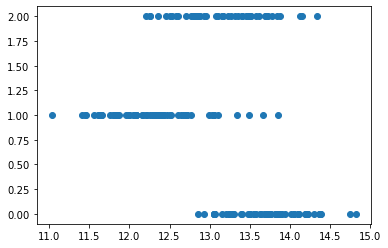

In [45]:
plt.figure()
plt.scatter(features[:,0],target)
plt.show()